# Clustering

Importation des Bibliothèques :

* numpy pour les calculs numériques.
* pandas pour la manipulation des données.
* matplotlib.pyplot pour la visualisation des données.
* warnings pour gérer les avertissements.

In [22]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import warnings 
warnings.filterwarnings("ignore")

Chargement du Dataset :

* Le fichier mallCustomerData.txt est chargé dans un DataFrame data.
* Affichage de la forme du DataFrame et des premières lignes pour vérification.

In [23]:
data = pd.read_csv('mallCustomerData.txt', sep=",")
print(data.shape)
data.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df = pd.DataFrame(data, columns= ['CustomerID','Gender', 'Age','Annual Income (k$)','Spending Score (1-100)'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
print(data['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


Création d'un DataFrame df avec des colonnes spécifiques.
* Comptage des occurrences de chaque genre dans la colonne Gender.

In [26]:
data = pd.get_dummies(data,columns=['Gender'])
print(data)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Female  Gender_Male  
0            False         True  
1            False         True  
2             True        False  
3             True        False  
4            

Encodage des Variables Catégorielles :

* Transformation de la colonne Gender en variables binaires (one-hot encoding).


CustomerID
Age
Annual Income (k$)
Spending Score (1-100)
Gender_Female
Gender_Male


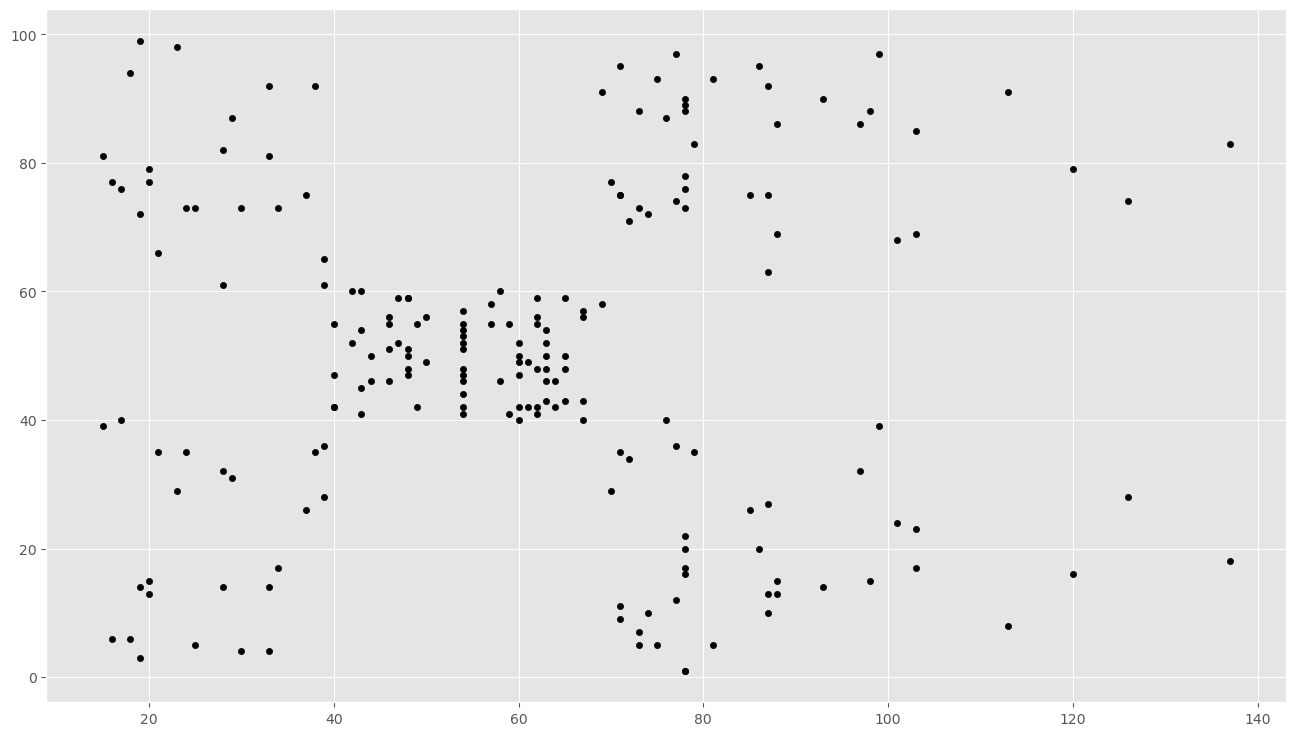

In [27]:
f1 = data['Annual Income (k$)'].values
f2 = data['Spending Score (1-100)'].values

for key in data.keys():
    print(key)
X = np.array(list(zip(f1, f2)))
#X=[[1, 1], [1, 2], [3, 3],[4,4]]
plt.scatter(f1, f2, c='black', s=20)

Extraction des Caractéristiques et Visualisation :

* Extraction des valeurs de Annual Income (k$) et Spending Score (1-100) pour les utiliser comme caractéristiques.
* Création d'un tableau X contenant ces caractéristiques et affichage d'un nuage de points.

CustomerID
Age
Annual Income (k$)
Spending Score (1-100)
Gender_Female
Gender_Male


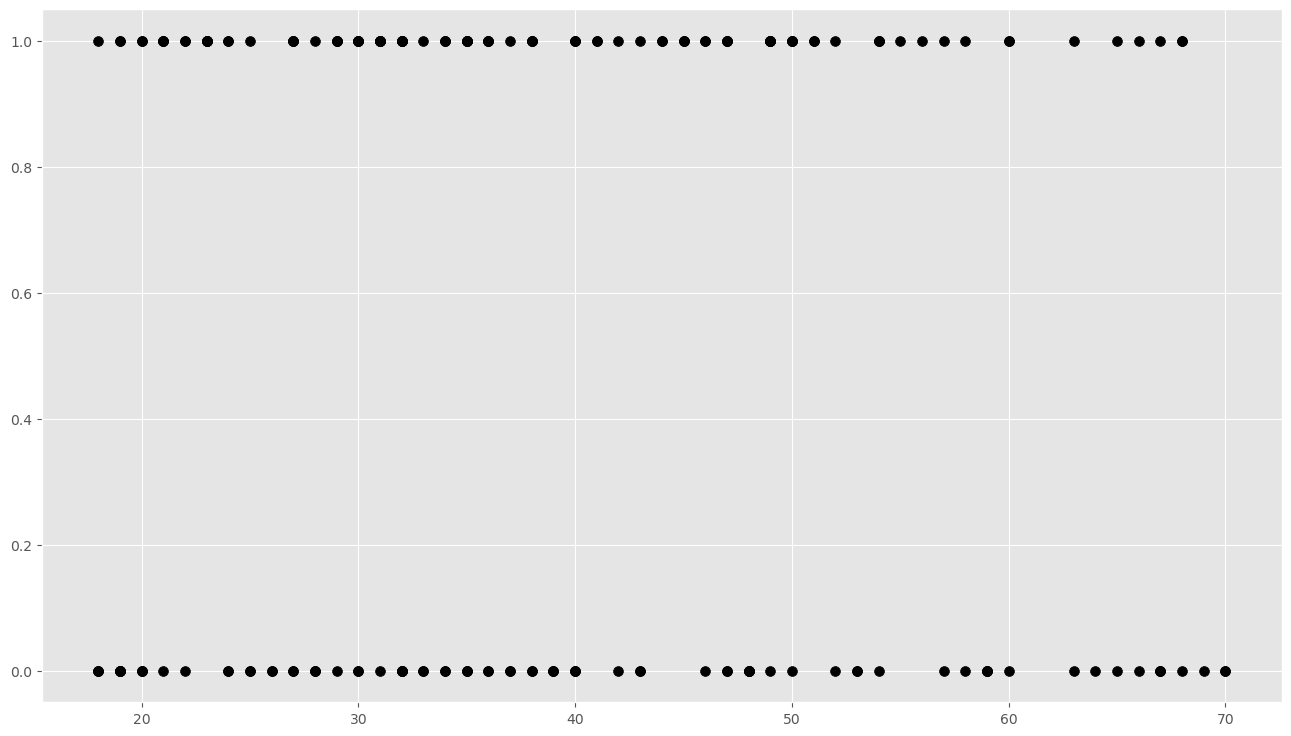

In [28]:
f3 = data['Age'].values
f4 = data['Gender_Female'].values


for key in data.keys():
    print(key)
X = np.array(list(zip(f3, f4)))
#X=[[1, 1], [1, 2], [3, 3],[4,4]]
plt.scatter(f3, f4, c='black', s=50)

CustomerID
Age
Annual Income (k$)
Spending Score (1-100)
Gender_Female
Gender_Male


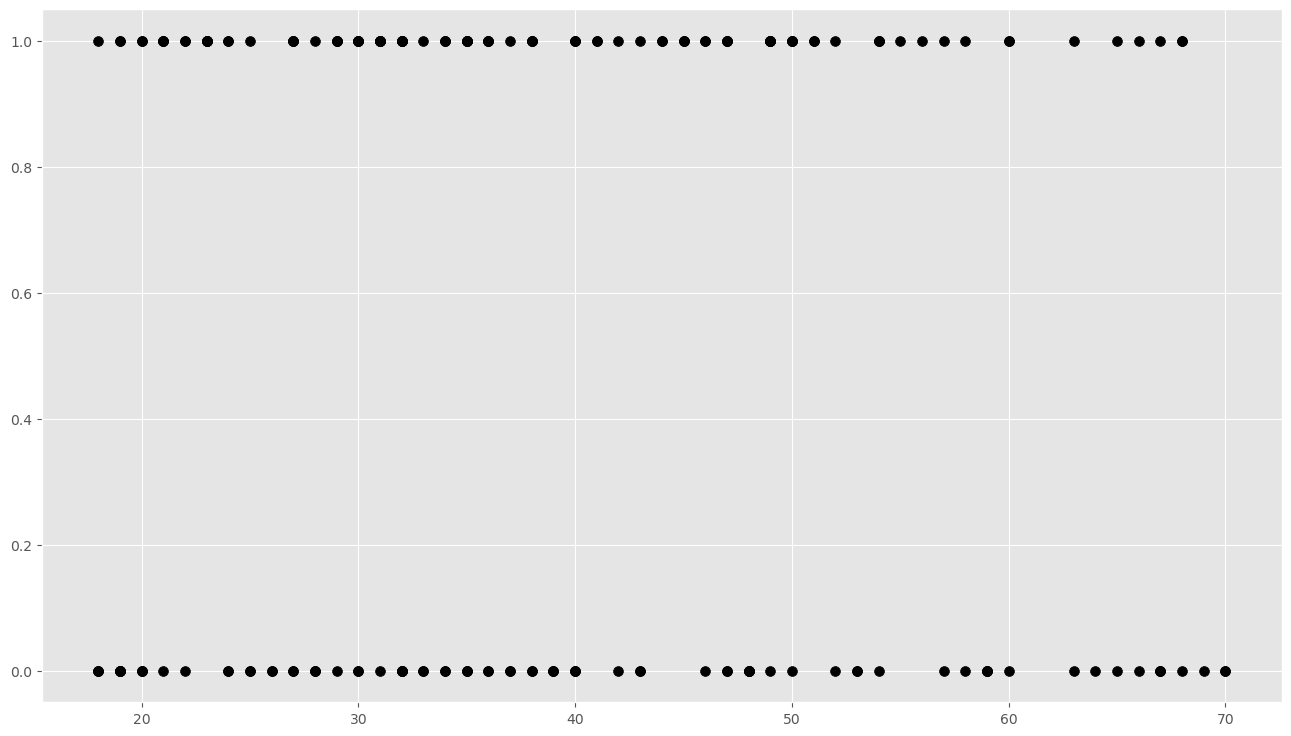

In [29]:
f3 = data['Age'].values
f5 = data['Gender_Male'].values


for key in data.keys():
    print(key)
X = np.array(list(zip(f3, f4)))
#X=[[1, 1], [1, 2], [3, 3],[4,4]]
plt.scatter(f3, f4, c='black', s=50)

Création et Visualisation des Données avec Différentes Caractéristiques :

* Extraction des valeurs d'Age et des variables binaires de genre pour la visualisation.
* Création de plusieurs tableaux X et affichage de nuages de points pour ces caractéristiques.

In [30]:
# Nombre de clusters
k = 1
# Coordonnées X des centroides aléatoires
C_x = np.random.randint(0, np.max(X)-2, size=k)
# Coordonnées Y des centroides aléatoires
C_y = np.random.randint(0, np.max(X)-2, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[47. 58.]]


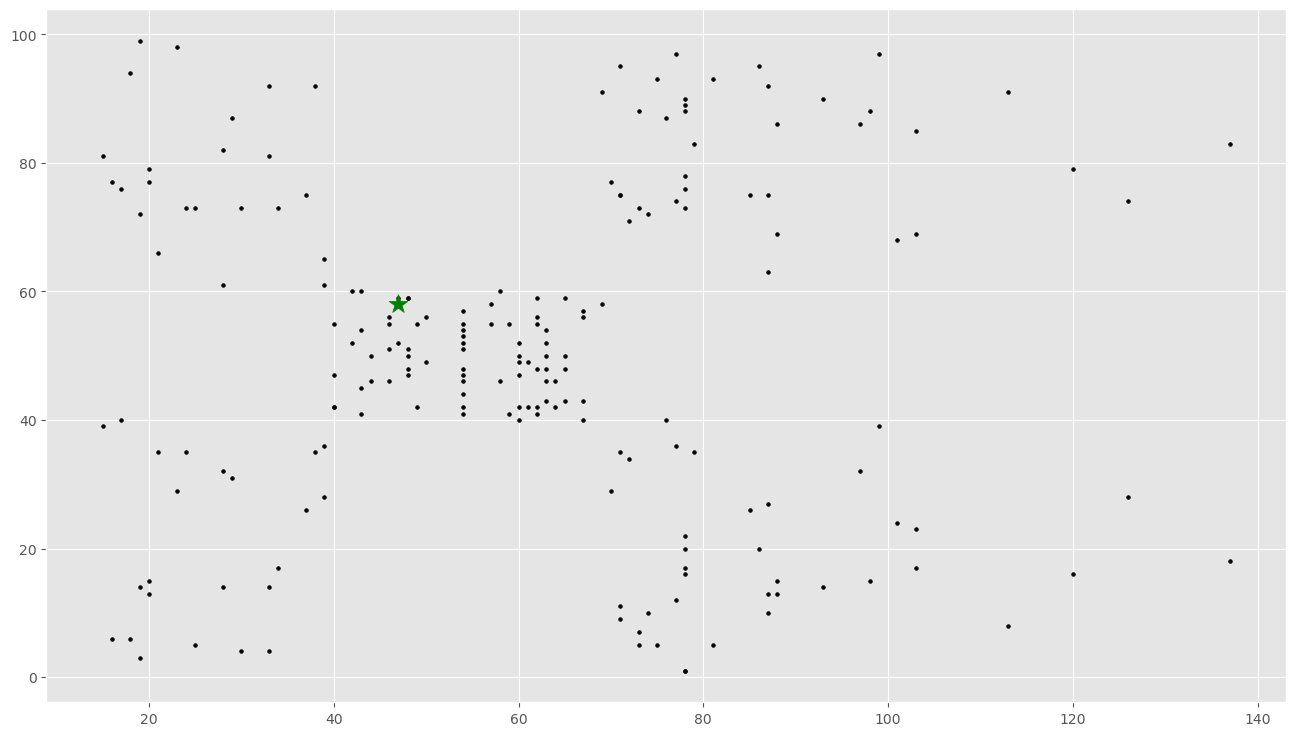

In [31]:
# Visualisation avec les Centroides
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

## Approche avec Scikit-Learn

Initialisation des Centroides et Visualisation :

* Initialisation des centroides de manière aléatoire pour k=1 cluster.
* Affichage des points de données avec les centroides sur le graphique.

In [32]:
from sklearn.cluster import KMeans
#Nombre de clusters
kmeans = KMeans(n_clusters=3)
# FEntraînement sur les données
kmeans = kmeans.fit(X)
#  Obtention des étiquettes de clusters
labels = kmeans.predict(X)
# Valeurs des centroides
centroids = kmeans.cluster_centers_

In [33]:
# Comparaison avec les centroides obtenus manuellement
print(C) #De manière manuelle
print(centroids) # Avec scikit-learn

[[47. 58.]]
[[61.44444444  0.41666667]
 [26.4494382   0.57303371]
 [42.72        0.61333333]]


Vous pouvez voir que les valeurs des centroides sont égales, mais dans un ordre différent.

Nous allons générer un nouveau dataset en utilisant la fonction make_blobs.

Approche avec Scikit-Learn :

* Utilisation de l'algorithme KMeans de scikit-learn pour le clustering avec k=3 clusters.
* Entraînement du modèle sur les données et prédiction des étiquettes de cluster.
* Affichage des centroides obtenus avec scikit-learn et comparaison avec les centroides initiaux.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Création d'un dataset d'exemple avec 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

In [35]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

<Figure size 1600x900 with 0 Axes>

In [36]:
#  Initialisation de KMeans
kmeans = KMeans(n_clusters=4)
# Entraînement avec les données
kmeans = kmeans.fit(X)
# Prédiction des clusters
labels = kmeans.predict(X)
# Obtention des centres des clusters
C = kmeans.cluster_centers_

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

<Figure size 1600x900 with 0 Axes>

Création et Visualisation d'un Nouveau Dataset :

* Génération d'un nouveau dataset avec make_blobs pour 4 clusters en 3 dimensions.
* Visualisation des clusters et des centroides avec un graphique 3D.

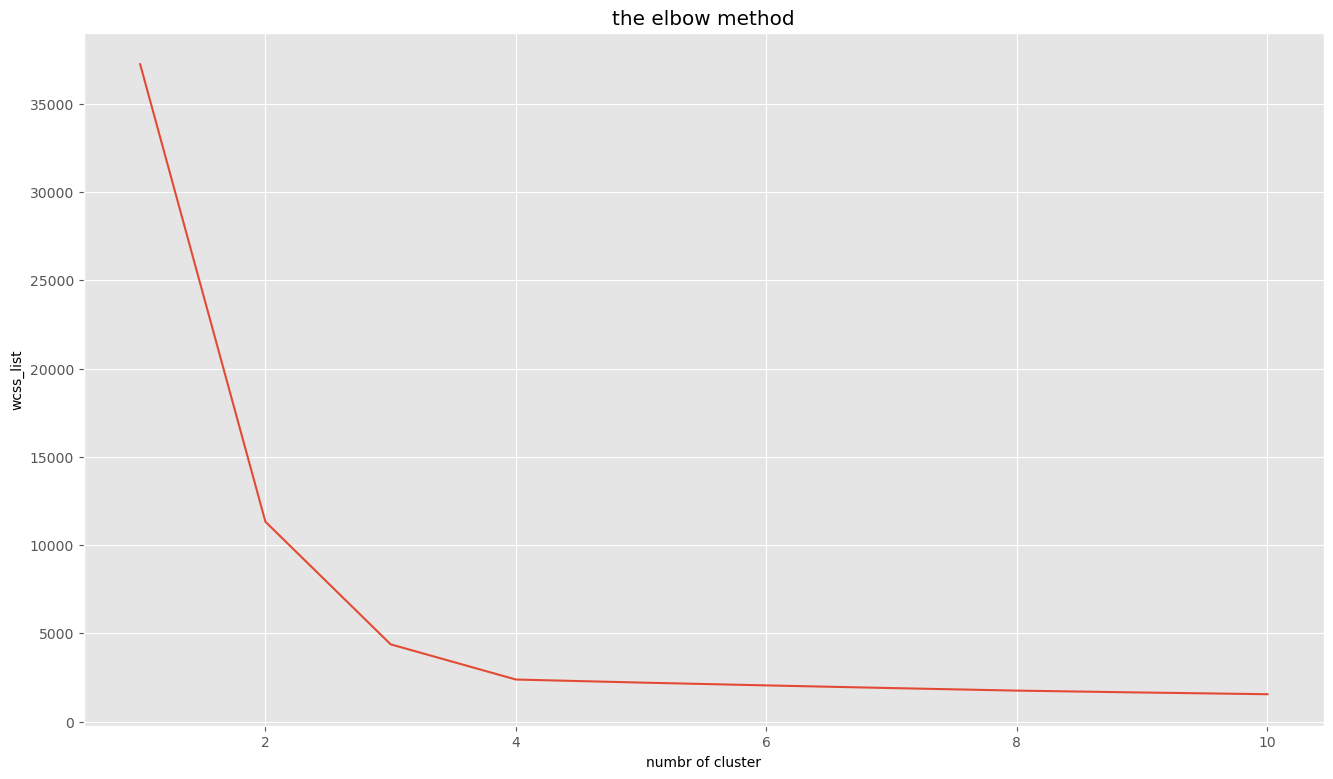

In [20]:
# Trouver le nombre optimal de clusters en utilisant la méthode du coude
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
wcss_list =[]  # Initialisation de la liste pour les valeurs de WCSS

#  10 itérations
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state =42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_list)
plt.title("the elbow method")
plt.xlabel("numbr of cluster")
plt.ylabel("wcss_list")
plt.show()

Méthode du Coude pour Trouver le Nombre Optimal de Clusters :

Utilisation de la méthode du coude pour déterminer le nombre optimal de clusters.
Calcul du WCSS (Within-Cluster Sum of Squares) pour différents nombres de clusters 
et tracé de la courbe pour visualiser le point d'inflexion.